# Question 1

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# (a)
# |a-b| + |a-c| > |b-c|

# (b)
a = np.array([2, 5])
b = np.array([5, 3])
c = np.array([3, 1])

x = np.array([3, 3.1])
L_a = np.max(np.abs(x-a))
L_b = np.max(np.abs(x-b))
L_c = np.max(np.abs(x-c))

class_info = np.argmin([L_a, L_b, L_c]) + 1
print(x, 'belongs to', class_info)

# (c)
x = np.array([2.1, 2.7])
L1_a = np.sum(np.abs(x-a))
L1_b = np.sum(np.abs(x-b))
L1_c = np.sum(np.abs(x-c))
print(L1_a, L1_b, L1_c)

class_info = np.argmin([L1_a, L1_b, L1_c]) + 1
print(x, 'belongs to class', class_info)


[3.  3.1] belongs to 1
2.4 3.1999999999999997 2.6
[2.1 2.7] belongs to 1


# Question 2

In [ ]:
# (a)
# lambda(a1|w1): given the bulb doesn't fail, loss when pruchase from company A
# => 2
# lambda(a1|w2): given the bulb fails, loss when pruchase from company A
# => 32
# lambda(a2|w1): given the bulb doesn't fail, loss when pruchase from company B
# => 3
# lambda(a2|w2): given the bulb fails, loss when pruchase from company B
# => 18

# (b)
lambda_a1w1 = 2
lambda_a1w2 = 32
lambda_a2w1 = 3
lambda_a2w2 = 18

p_w2a1 = 0.07
p_w1a1 = 1 - p_w2a1
p_w2a2 = 0.05
p_w1a2 = 1 - p_w2a2

R_a1 = lambda_a1w1 * p_w1a1 + lambda_a1w2 * p_w2a1
R_a2 = lambda_a2w1 * p_w1a2 + lambda_a2w2 * p_w2a2
print('Risk of choosing company A:', R_a1)
print('Risk of choosing company B:', R_a2)
if R_a1 <= R_a2:
  print("Therefore choose company A.")
else:
  print("Therefore choose company B.")

Risk of choosing company A: 4.1
Risk of choosing company B: 3.7499999999999996
Therefore choose company B.


# Question 3

In [ ]:
p_w1 = 0.3
p_w2 = 0.4
p_w3 = 0.3

p_xw1 = 0.2
p_xw2 = 0.2
p_xw3 = 0.4

evidence = p_w1*p_xw1 + p_w2*p_xw2 + p_w3*p_xw3
p_w1x = (p_xw1 * p_w1) / evidence
p_w2x = (p_xw2 * p_w2) / evidence
p_w3x = (p_xw3 * p_w3) / evidence

print('Posterior:')
print(p_w1x)
print(p_w2x)
print(p_w3x)

print('Choose the one with the largest posterior, so choose w%d.' %
      (np.argmax([p_w1x, p_w2x, p_w3x])+1))

Posterior:
0.23076923076923075
0.30769230769230776
0.4615384615384615
Choose the one with the largest posterior, so choose w3.


# Question 4

**(a)**

Suppose we have 3 points on the hyperplane x1, x2 and x3:

w.T * x1 + w0 = w.T * x2 + w0 = w.T * x3 + w0 = 0

w.T * (x1 - x2) = w.T * (x1 - x3) = w.T * (x2 - x3) = 0

This means w is perpendicular to all the vectors (x1 - x2), (x1 - x3), (x2 - x3). These three vectors are all on the hyperplane so w has to be perpendicular to the hyperplane.

In [ ]:
# (b)
w0 = 10
w = np.array([2, -7, 1])
x = np.array([-3, 2, 9])

g = np.matmul(w, x) + w0
print('g =',g)
if g <= 0:
  print('Class 1')
else:
  print('Class 2')

# (c)
x = np.array([3, 2, 1])
g = np.matmul(w, x) + w0
r = g / np.sqrt(w[0]**2 + w[1]**2 + w[2]**2)
print('Distance =', r)

g = -1
Class 1
Distance = 0.408248290463863


# Question 5

In [62]:
# (a)
x1 = np.array([1, -2])
x2 = np.array([2, -4])
x3 = np.array([3, -6])

X = np.array([x1, x2, x3])
mu = np.mean(X, axis=0)
cov = np.matmul((X-mu).T, (X-mu)) / len(x1)
# print(cov)

eigvals, eigvec = np.linalg.eig(cov)
# print(eigvals)
# print(eigvec)
eigvec = eigvec[:, np.argsort(eigvals)[::-1]]

pc1 = eigvec[:, 0]
pc2 = eigvec[:, 1]
print('First principle component:\n', pc1)
print('Second principle component:\n', pc2)

# (b)
p1 = np.array([0.667, 0.667, 0.333])
p2 = np.array([0.596, -0.298, 0.745])
p3 = np.array([0.333, 0.667, -0.667])
x = np.array([-2, 3, 1])

t1 = np.dot(x, p1) * p1
t2 = np.dot(x, p2) * p2
t3 = np.dot(x, p3) * p3

# print('x =', t1, '+', t2, '+', t3)
# print('x =', t1+t2+t3)  # this doesn't give correct x because the principle components are not orthogonal
print('x = t1 + t2 + t3')
print(np.dot(x, p1), np.dot(x, p2), np.dot(x, p3))

First principle component:
 [ 0.4472136  -0.89442719]
Second principle component:
 [-0.89442719 -0.4472136 ]
x = [0.667 0.667 0.333] + [-0.799236  0.399618 -0.999045] + [ 0.222444  0.445556 -0.445556]
x = [ 0.090208  1.512174 -1.111601]
1.0000000000000002 -1.3409999999999997 0.6680000000000004


# Question 6

-0.09118212917428394


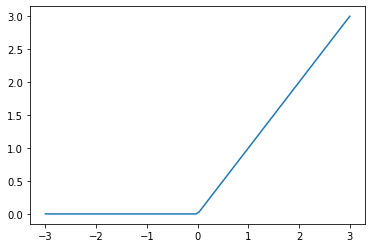

In [79]:
# (a)
# Because complex relationships between features can't be captured with linear activation functions.
# Combination of non linear activation functions enable complexity.

# (b)
x = np.linspace(-3, 3, 100)
y = x.copy()
y[x<0] = 0
plt.plot(x, y)

# (c)
def sigmoid(x):
  S = 1 / (1 + np.exp(-x))
  return S

# (c)
ytrue = 0.8
x = 0.2
beta = -0.8
gx = 0.1*sigmoid(x+0.3) + beta*sigmoid(-0.8*x-0.1) - 0.5
fgx = sigmoid(gx)
dgdb = sigmoid(-0.8*x-0.1)
dfdg = np.exp(-gx) / (1 + np.exp(-gx))**2  # derivative of sigmoid\

dfdb = dfdg * dgdb
dLdb = 2 * (fgx - ytrue) * dfdb
print(dLdb)

# Question 7

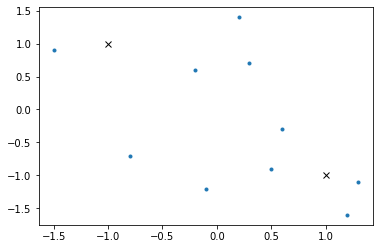

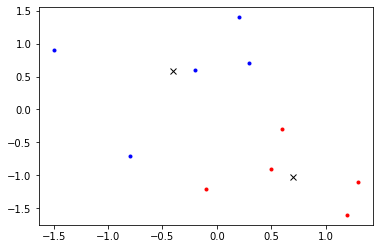

mean1: [-0.4   0.58]
mean2: [ 0.7  -1.02]


In [91]:
X = np.array([[-1.5, 0.9],
        [0.3, 0.7],
        [0.5, -0.9],
        [-0.1, -1.2],
        [-0.2, 0.6],
        [1.3, -1.1],
        [0.2, 1.4],
        [-0.8, -0.7],
        [1.2, -1.6],
        [0.6, -0.3]])
mean1 = np.array([-1, 1])
mean2 = np.array([1, -1])

plt.plot(X[:, 0], X[:, 1], '.')
plt.plot(mean1[0], mean1[1], 'kx')
plt.plot(mean2[0], mean2[1], 'kx')
plt.show()
class_info = np.ndarray(len(X))
for i in range(len(X)):
  dist1 = np.sqrt((X[i][0] - mean1[0])**2 + (X[i][1] - mean1[1])**2)
  dist2 = np.sqrt((X[i][0] - mean2[0])**2 + (X[i][1] - mean2[1])**2)
  class_info[i] = 1 if dist1 < dist2 else 2

mean1 = np.mean(X[class_info==1, :], axis=0)
mean2 = np.mean(X[class_info==2, :], axis=0)

plt.plot(X[class_info==1, 0], X[class_info==1, 1], 'b.')
plt.plot(X[class_info==2, 0], X[class_info==2, 1], 'r.')
plt.plot(mean1[0], mean1[1], 'kx')
plt.plot(mean2[0], mean2[1], 'kx')
plt.show()

print('mean1:', mean1)
print('mean2:', mean2)

# Question 8

In [93]:
x1 = 0.8
x2 = 0.8

# move along x1:
C = np.exp(x1**2 + 0.9*x1*x2 + 0.7*x2**2)
dCdx1 = C * (2*x1 + 0.9*x2)
# by making dCdx1 = 0:
x1 = -0.9*x2 / 2
print(x1, x2)

# move along x2:
C = np.exp(x1**2 + 0.9*x1*x2 + 0.7*x2**2)
dCdx2 = C * (0.9*x1 + 1.4*x2)
# by making dCdx1 = 0:
x2 = -0.9*x1 / 1.4
print(x1, x2)


-0.36000000000000004 0.8
-0.36000000000000004 0.23142857142857148


# Question 9

In [149]:
def mapping(x):
  return np.array([x[0], x[1], x[0]*x[1]])

def find_g(w, w0, x):
  return np.matmul(w, x) + w0

a = mapping([0, 0.8])
b = mapping([-1, 1])
x = mapping([-1, 0])

w = a - b
midpoint = (a+b) / 2
w0 = -np.matmul(w, midpoint)
print(find_g(w, w0, midpoint))
g_a = find_g(w, w0, a)
print(g_a)
g_b = find_g(w, w0, b)
print(g_b)

g_x = find_g(w, w0, x)
print(g_x)
if np.sign(g_x) == np.sign(g_a):
  print('Class 0')
else:
  print('Class 1')

0.0
1.02
-1.0200000000000002
0.17999999999999994
Class 0


# Question 10

**(a)**

(i). Smaller window has higher spatial resolution.
(ii). Larger window has lower variance therefore more accurate.

[0.12]


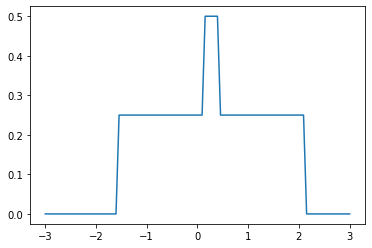

In [148]:
# (b)
def Parzen(x, xmid, h):
  m = len(xmid)
  S = 0
  for i in range(m):
    u = (x - xmid[i]) / h
    S += (np.abs(u) < 0.5).astype('int')
  p = 1 / (m*h) * S
  return p

h = 2
x = np.linspace(-3, 3, 100)
xmid = np.array([-0.6, 1.1])
p = Parzen(x, xmid, h)
plt.plot(x, p)

# (c)
h = 0.5
xmid = np.array([[0.1, 0.8], [1.1, 2.8], [0.2, 1.5], [0.8, 2.1], [1.2, 2.2], [2.7, 2.1], [1.9, 0.1], 
         [1.1, 2.0], [2.3, 1.8], [1.4, 0.9], [0.2, 2.9], [0.7, 1.3], [0.3, 2.8], [1.6, 1.9], 
         [1.1, 2.1], [0.5, 2.0], [1.0, 0.9], [2.3, 0.2], [2.2, 1.5], [0.8, 0.2], [2.8, 1.3], 
         [0.8, 2.2], [1.9, 0.9], [1.4, 2.0], [0.3, 0.1], [2.9, 2.8], [0.8, 1.8], [0.6, 2.4],
         ])
X = np.array([[1, 2]])

def Parzen2D(X, xmid, h):
  m = len(xmid)
  S = 0
  for i in range(m):
    u = (X - xmid[i]) / h
    # print(u)
    phi = ((np.abs(u[:, 0]) < 0.5) & (np.abs(u[:, 1]) < 0.5))
    S += phi.astype('int')
  p = 1 / (200*h**2) * S  # note I harcoded m to be 200 to be consistent with the question
  return p

p = Parzen2D(X, xmid, h)
print(p)

In [105]:
a = '''(0.1, 0.8), (1.1, 2.8), (0.2, 1.5), (0.8, 2.1), (1.2, 2.2), (2.7, 2.1), (1.9, 0.1), 
(1.1, 2.0), (2.3, 1.8), (1.4, 0.9), (0.2, 2.9), (0.7, 1.3), (0.3, 2.8), (1.6, 1.9), 
(1.1, 2.1), (0.5, 2.0), (1.0, 0.9), (2.3, 0.2), (2.2, 1.5), (0.8, 0.2), (2.8, 1.3), 
(0.8, 2.2), (1.9, 0.9), (1.4, 2.0), (0.3, 0.1), (2.9, 2.8), (0.8, 1.8), (0.6, 2.4)'''
print(a.replace('(', '[').replace(')', ']'))

[0.1, 0.8], [1.1, 2.8], [0.2, 1.5], [0.8, 2.1], [1.2, 2.2], [2.7, 2.1], [1.9, 0.1], 
[1.1, 2.0], [2.3, 1.8], [1.4, 0.9], [0.2, 2.9], [0.7, 1.3], [0.3, 2.8], [1.6, 1.9], 
[1.1, 2.1], [0.5, 2.0], [1.0, 0.9], [2.3, 0.2], [2.2, 1.5], [0.8, 0.2], [2.8, 1.3], 
[0.8, 2.2], [1.9, 0.9], [1.4, 2.0], [0.3, 0.1], [2.9, 2.8], [0.8, 1.8], [0.6, 2.4]
